<a href="https://colab.research.google.com/github/BaskaranV15/CODSOFT/blob/main/titanic_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
numeric_feature=(df[['Age','Survived','Pclass','Parch','Fare']]).corr()

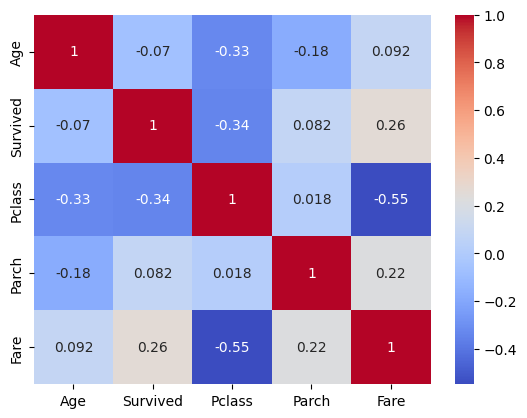

In [ ]:
sns.heatmap(numeric_feature,annot=True,cmap='coolwarm')
plt.show()

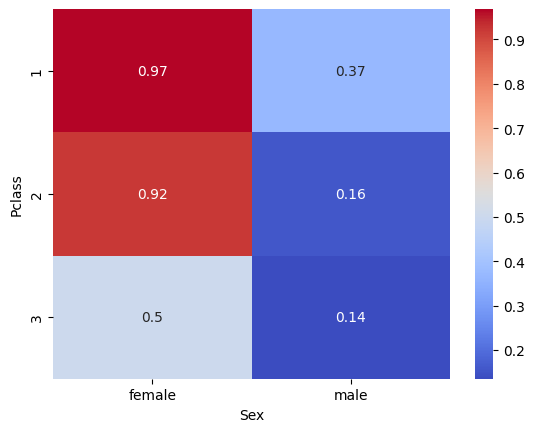

In [ ]:
# Create a heatmap for survival rate by passenger class
sns.heatmap(pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc='mean'),
            cmap='coolwarm', annot=True)
plt.show()


<Axes: ylabel='Age'>

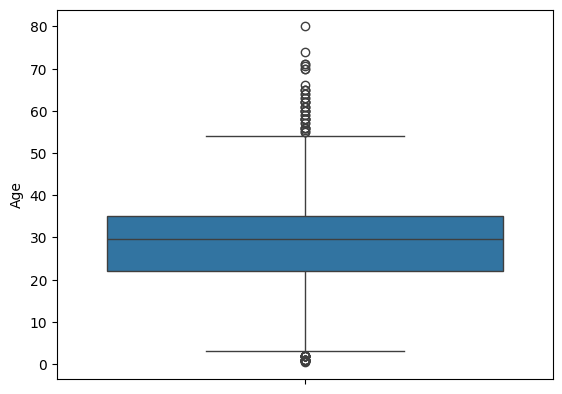

In [ ]:
sns.boxplot(y=df['Age'],data=df)

In [ ]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
print("first quantile",q1);
print("third quantile",q3);
IQR=q3-q1
print(IQR)

first quantile 22.0
third quantile 35.0
13.0


In [ ]:
low=q1-1.5*IQR
high=q3+1.5*IQR


In [ ]:
grouped_data = df.groupby('Age')
# Count the number of people in each age group
count_by_age = grouped_data['Age'].count()
print(count_by_age)

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 89, dtype: int64


In [ ]:
df =df[((df['Age']>=low)&(df['Age']<=high))]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<Axes: ylabel='Age'>

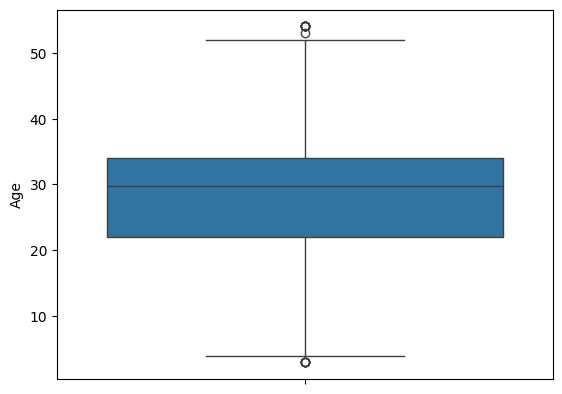

In [ ]:
sns.boxplot(y=df['Age'])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


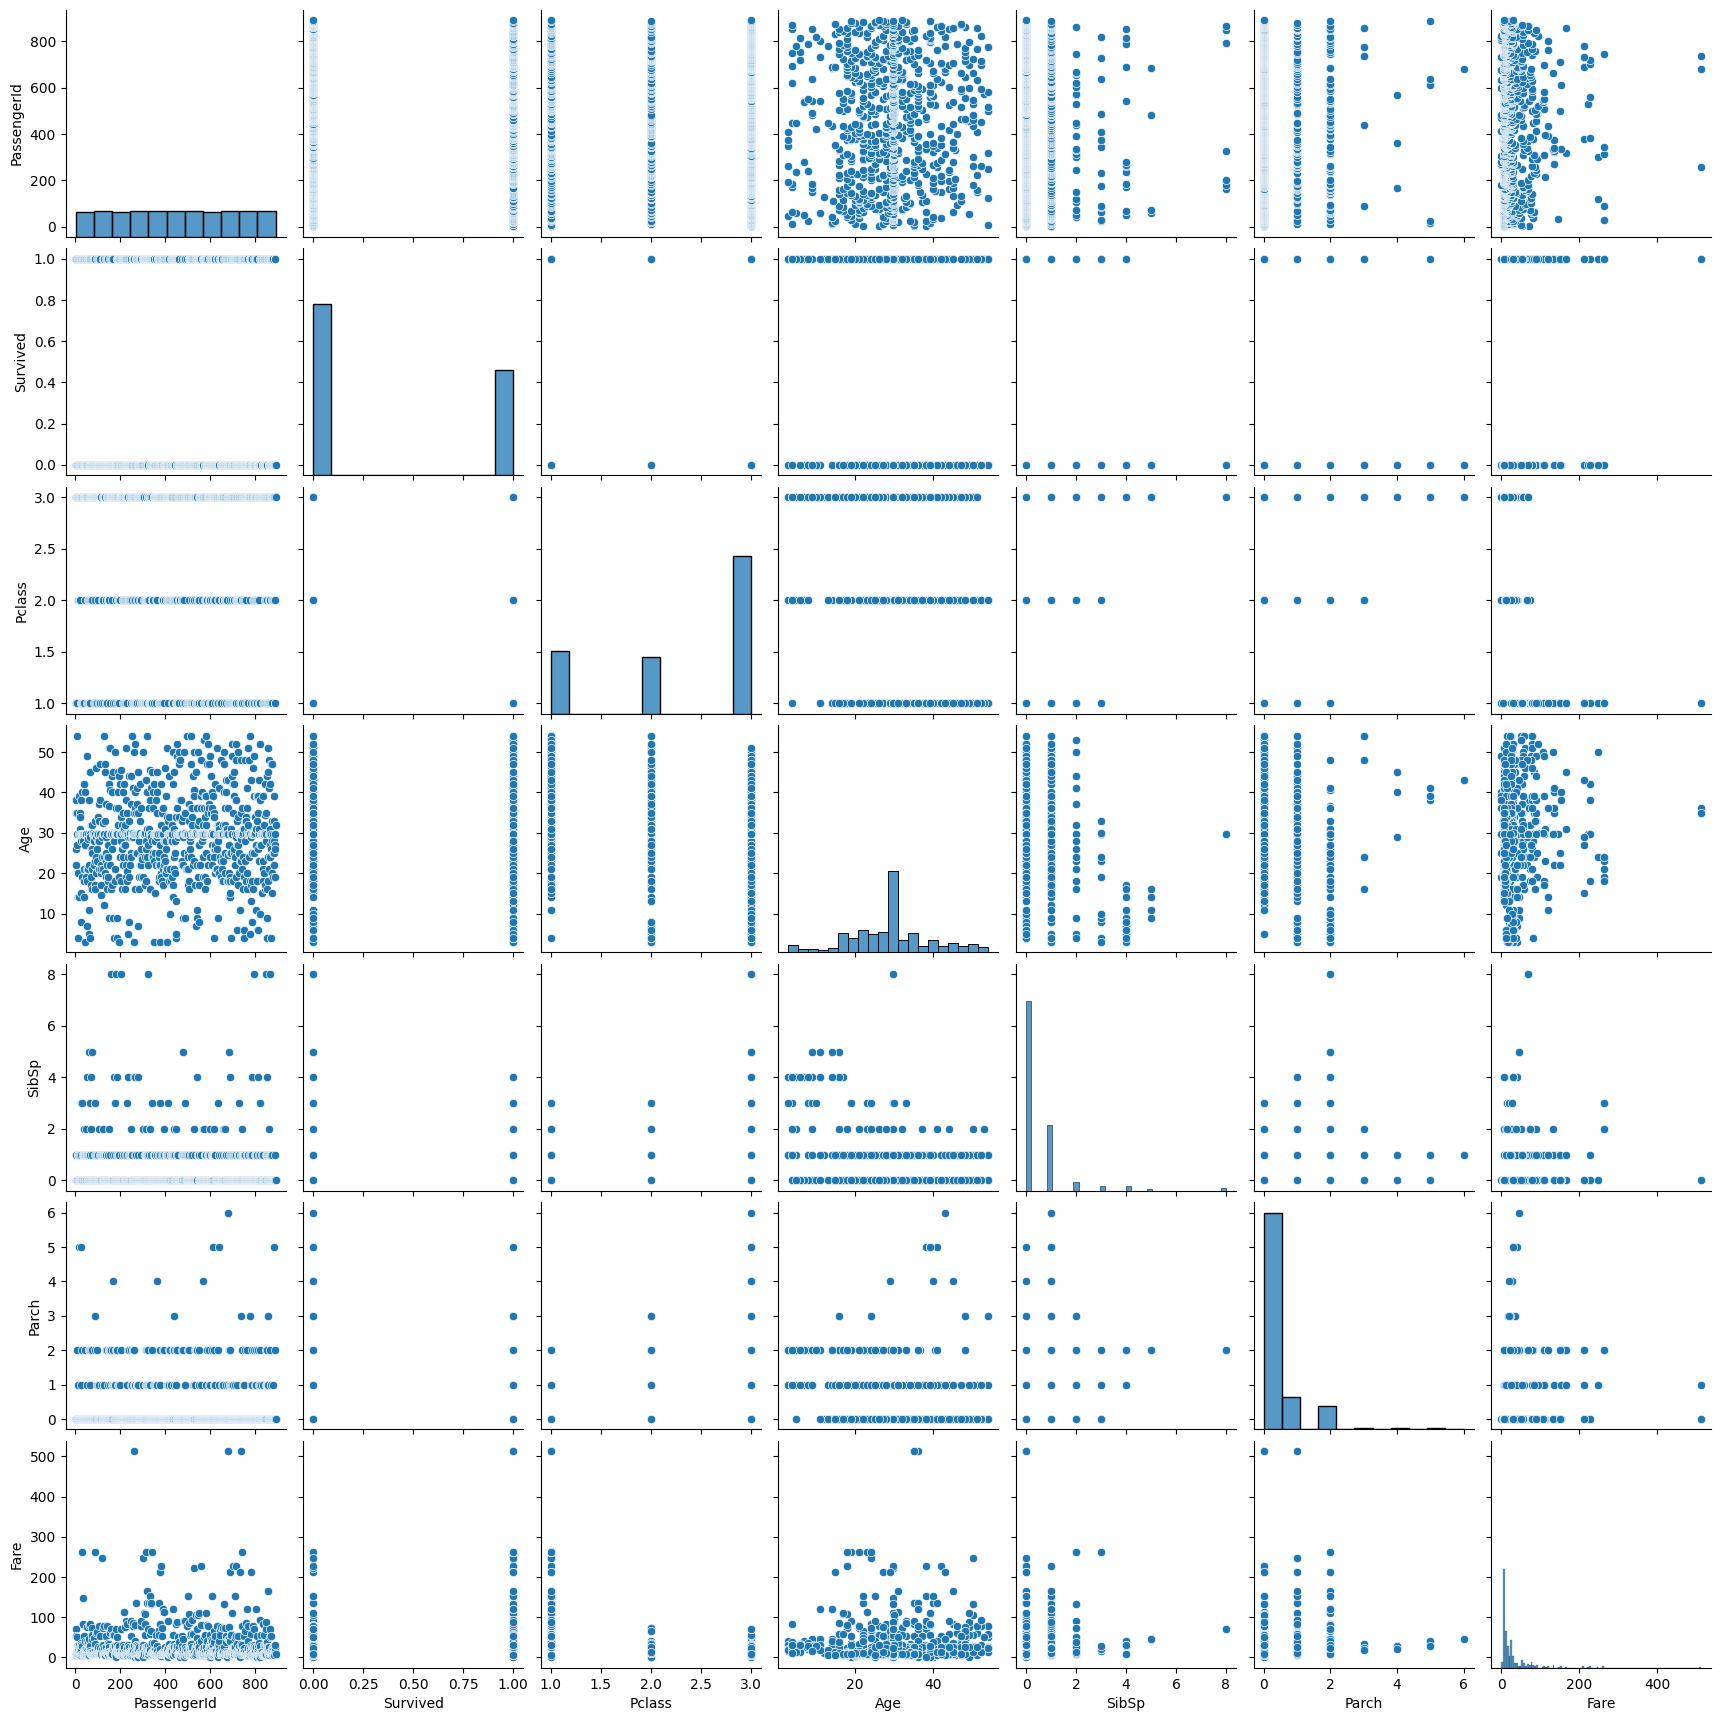

In [ ]:
sns.pairplot(df)

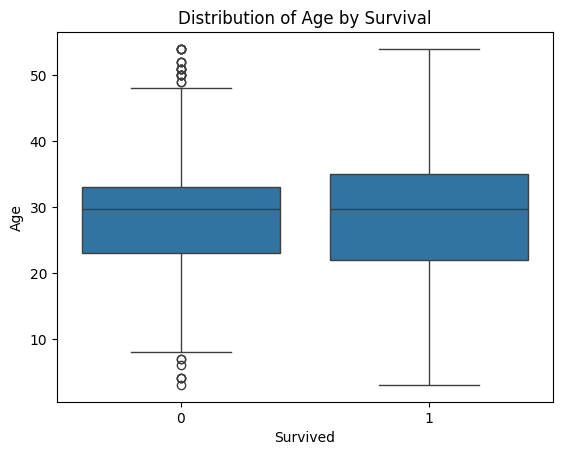

In [ ]:
import seaborn as sns

sns.boxplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribution of Age by Survival')
plt.show()

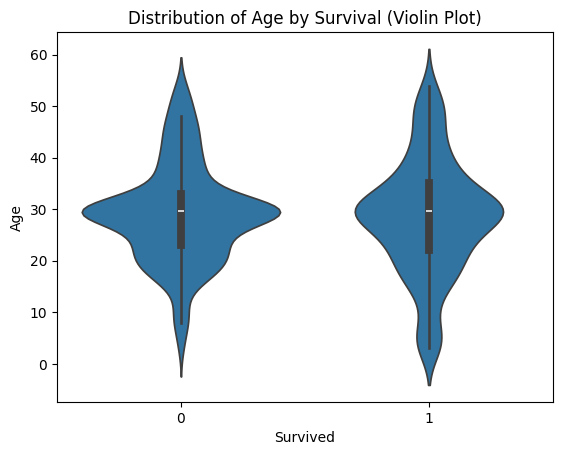

In [ ]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribution of Age by Survival (Violin Plot)')
plt.show()

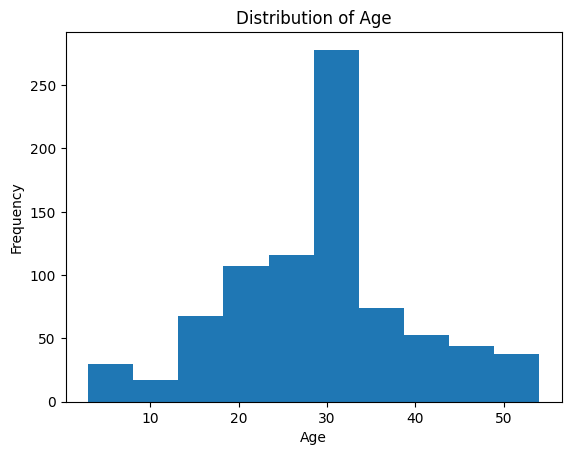

In [ ]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

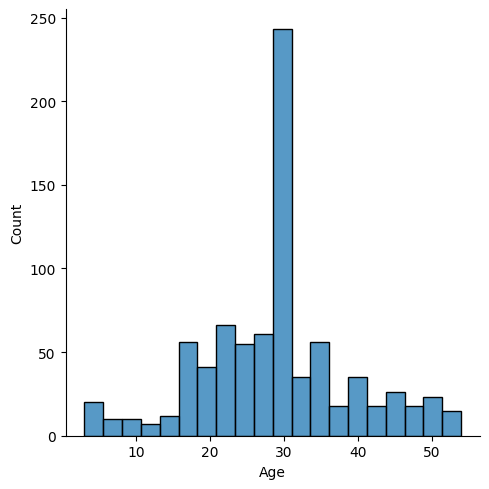

In [ ]:
sns.displot(df['Age'])

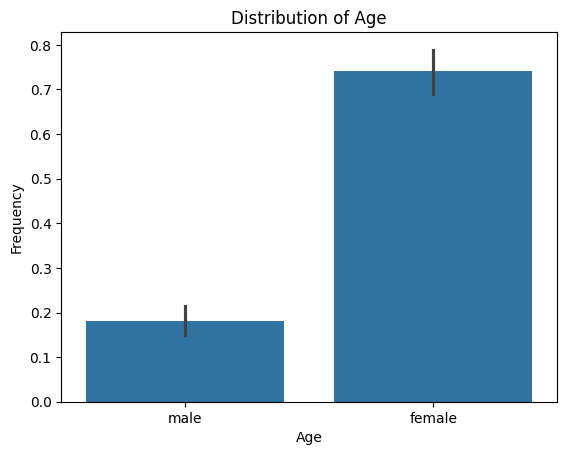

In [ ]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
df.drop(columns=['Name'],inplace=True)

<ipython-input-26-ffbc55cf7cce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Name'],inplace=True)


In [ ]:
df.drop(columns=['Ticket'],inplace=True)

<ipython-input-27-3cde0fe88e7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Ticket'],inplace=True)


In [ ]:
df.drop(columns='PassengerId',inplace=True)

<ipython-input-28-3fca41bf0c10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='PassengerId',inplace=True)


In [ ]:
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df['Cabin']=df['Cabin'].astype('category')

<ipython-input-29-9489885aecc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=df['Sex'].astype('category')
<ipython-input-29-9489885aecc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked']=df['Embarked'].astype('category')
<ipython-input-29-9489885aecc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
df['Sex']=df['Sex'].cat.codes
df['Embarked']=df['Embarked'].cat.codes
df['Cabin']=df['Cabin'].cat.codes

<ipython-input-30-857861b8ce9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=df['Sex'].cat.codes
<ipython-input-30-857861b8ce9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked']=df['Embarked'].cat.codes
<ipython-input-30-857861b8ce9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,38,2
1,1,1,0,38.000000,1,0,71.2833,69,0
2,1,3,0,26.000000,0,0,7.9250,38,2
3,1,1,0,35.000000,1,0,53.1000,45,2
4,0,3,1,35.000000,0,0,8.0500,38,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,38,2
887,1,1,0,19.000000,0,0,30.0000,22,2
888,0,3,0,29.699118,1,2,23.4500,38,2
889,1,1,1,26.000000,0,0,30.0000,50,0


In [ ]:
y=df.iloc[:,0]

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 825, dtype: int64


In [ ]:
x=df.iloc[:,1:]

In [ ]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500     38         2
1         1    0  38.000000      1      0  71.2833     69         0
2         3    0  26.000000      0      0   7.9250     38         2
3         1    0  35.000000      1      0  53.1000     45         2
4         3    1  35.000000      0      0   8.0500     38         2
..      ...  ...        ...    ...    ...      ...    ...       ...
886       2    1  27.000000      0      0  13.0000     38         2
887       1    0  19.000000      0      0  30.0000     22         2
888       3    0  29.699118      1      2  23.4500     38         2
889       1    1  26.000000      0      0  30.0000     50         0
890       3    1  32.000000      0      0   7.7500     38         1

[825 rows x 8 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
print(x_train.shape)

(660, 8)


In [ ]:
print(y_train.shape)

(660,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg=LogisticRegression()

In [ ]:
reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,38,2
1,1,1,0,38.000000,1,0,71.2833,69,0
2,1,3,0,26.000000,0,0,7.9250,38,2
3,1,1,0,35.000000,1,0,53.1000,45,2
4,0,3,1,35.000000,0,0,8.0500,38,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,38,2
887,1,1,0,19.000000,0,0,30.0000,22,2
888,0,3,0,29.699118,1,2,23.4500,38,2
889,1,1,1,26.000000,0,0,30.0000,50,0


In [ ]:
list=eval(input("enter a pclass ,sex,age,sibsp,fare,cabin,embaked"))

enter a pclass ,sex,age,sibsp,fare,cabin,embaked[[1,1,32,1,1,600,62,2]]


In [ ]:
reg.predict([[1,1,32,1,1,600,62,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
reg.predict(list)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
reg.score(x_test,y_test)

0.8181818181818182